In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

reviewsDF = pd.read_csv("./reviews_detail.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9452127,58944174,2016-01-05,6279455,Ravi,Great place. Helena was prompt to reply and ve...
1,9452127,59446510,2016-01-10,23770684,Shiv,We had previously stayed at the apartment over...
2,9452127,59557387,2016-01-11,29070567,Jandall,Helena was a great host and extremely accommod...
3,9452127,62664325,2016-02-15,58381183,Cody,Helena was extremely accessible throughout the...
4,9452127,63410004,2016-02-22,29014080,Magnus,Awesome place! Looks just as in photos. Plenty...


In [3]:
reviewsDF.shape

(800995, 6)

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0
for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'polarity_value',ss)
    reviewsDF.set_value(index,'neg',ss['neg'])
    reviewsDF.set_value(index,'pos',ss['pos'])
    reviewsDF.set_value(index,'neu',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])
reviewsDF.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future r

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,9452127,58944174,2016-01-05,6279455,Ravi,Great place. Helena was prompt to reply and ve...,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",0.00,0.308,0.692,0.9115
1,9452127,59446510,2016-01-10,23770684,Shiv,We had previously stayed at the apartment over...,"{'neg': 0.06, 'neu': 0.77, 'pos': 0.17, 'compo...",0.06,0.170,0.770,0.8990
2,9452127,59557387,2016-01-11,29070567,Jandall,Helena was a great host and extremely accommod...,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.00,0.312,0.688,0.9274
3,9452127,62664325,2016-02-15,58381183,Cody,Helena was extremely accessible throughout the...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.00,0.113,0.887,0.8316
4,9452127,63410004,2016-02-22,29014080,Magnus,Awesome place! Looks just as in photos. Plenty...,"{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...",0.00,0.349,0.651,0.9431


In [0]:
reviewsDF.to_csv('pority_Values_reviews.csv')

In [13]:

# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.set_value(index,'language',lang)
    
#taking rows whose language is English
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,9452127,58944174,2016-01-05,6279455,Ravi,Great place. Helena was prompt to reply and ve...,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",0.00,0.308,0.692,0.9115,en
1,9452127,59446510,2016-01-10,23770684,Shiv,We had previously stayed at the apartment over...,"{'neg': 0.06, 'neu': 0.77, 'pos': 0.17, 'compo...",0.06,0.170,0.770,0.8990,en


In [14]:
polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,17755,0.0,positive
1,110831,0.1,positive
2,216154,0.2,positive
3,175585,0.3,positive
4,91061,0.4,positive


In [15]:
# Lets visualize polarity score for negativity

polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,count_of_Comments,RANGE,Sentiment
0,199941,0.0,negative
1,15383,0.1,negative
2,1785,0.2,negative
3,463,0.3,negative
4,188,0.4,negative


In [16]:
# Lets visualize polarity score for neutrality

polarDFnut=EngReviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutrl')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,count_of_Comments,RANGE,Sentiment
0,172,0.0,neutrl
1,5066,0.1,neutrl
2,9846,0.2,neutrl
3,20061,0.3,neutrl
4,44763,0.4,neutrl


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

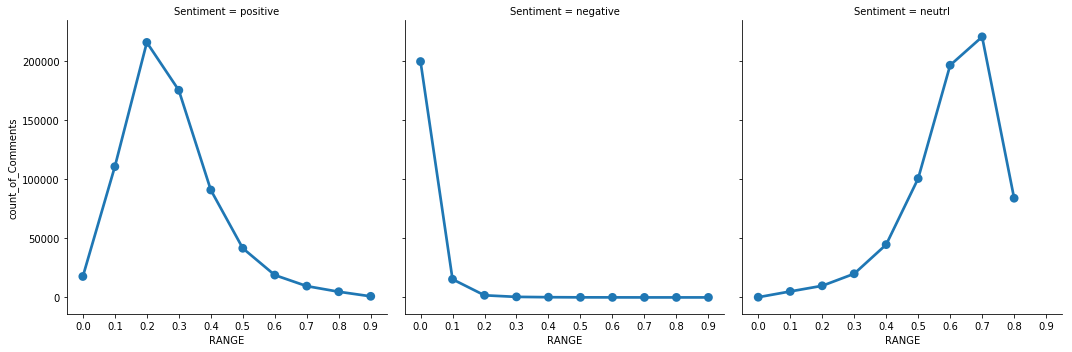

In [18]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment")
plt.savefig('sentiment_plot.png')

Most of the Comments are Neutral, while a few positve ones can also be seen. Negative comments are very few